# Wrangle And Analyze Twitter Archive

### Table of Contents
- [Introduction](#intro)
- [Part I - Data Wrangling](#Wrangling)
  - [Gathering](#gathering)
  - [Assessing](#assessing)
  - [Cleaning](#cleaning)
- [Part II - Storing Data](#storing)
- [Part III - Analyzing & Visualizing](#analyzing)
- [References](#references)



<a id='intro'></a>
## Introduction

Real-world data rarely comes clean, hence the focus of this project is on Data Wrangling. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

Afterwards, the augmented data will be used to create interesting and trustworthy analyses and visualizations. 

### The Dataset

The dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


<a id='Wrangling'></a>
## Part I - Data Wrangling


To get started, let's first import our libraries and read our main dataset provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import re
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


<a id='gathering'></a>
### Gathering Data

In addition to the dataset provided, we will gather more data to create exciting and "Wow!"-worthy analyses and visualizations.

 **Image Prediction File**: Downloading the file hosted on Udacity's servers programmatically using the Requests library 

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Reading the downloaded file and checking the first couple of rows
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Additional Data via the Twitter API**

The code below is to query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt

In [ ]:
# importing the libraries 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Then, we will read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, favorite count and language.

In [6]:
# List of dictionaries to build file by file and later convert to a DataFrame
tweets_list = []

with open('tweet_json.txt', encoding='utf-8') as file:
    
    #loop in the file line by line
    for line in file:
        data = json.loads(line)
        #Extract the attributes
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        language = data['lang']
    
        # Append to list of dictionaries
        tweets_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count,
                           'language': language}) 

#convert tweet_list into a dataframe
tweets_data = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'language'])
    
#view the first couple of rows
tweets_data

,tweet_id,retweet_count,favorite_count,language
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en
...,...,...,...,...
2349,666049248165822465,41,111,en
2350,666044226329800704,147,311,en
2351,666033412701032449,47,128,en
2352,666029285002620928,48,132,en


<a id='assessing'></a>
### Assessing Data

We'll start off describing the datasets and then visually assessing them by displaying each dataframe. This will be followed by programmatic assessment.

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`Data Dictionary`

**tweet_id:** The representation of the unique identifier for this Tweet. <br>
**in_reply_to_status_id:** Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID. <br>
**in_reply_to_user_id:** Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.<br>
**timestamp:** Date and time that the tweet was posted. <br>
**source:** Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web. <br>
**text:** The actual text of the status update.<br>
**retweeted_status_id:** Nullable. This column contains the original Tweet ID that was retweeted.<br>
**retweeted_status_user_id:** Nullable. This column contains the author ID of the original Tweet that was retweeted.<br>
**retweeted_status_timestamp:** Nullable. This column contains the day and time of the original Tweet ID that was retweeted.<br>
**expanded_urls:** Url link of the tweet. <br>
**rating_numerator:** The numerator of the rating found in the tweet. <br>
**rating_denominator:** The denominator of the rating found in the tweet. <br>
**name:** Nullable. The name of the dog mentioned in the tweet. <br>
**doggo:** Nullable. whether the stage of the dog is "Doggo" or not. <br>
**floofer:** Nullable. whether the stage of the dog is "Floofer" or not. <br>
**pupper:** Nullable. whether the stage of the dog is "Pupper" or not. <br>
**puppo:** Nullable. whether the stage of the dog is "Puppo" or not. <br>

**The Dogtionary (Dog Stages):**

- Doggo: A big pupper, usually older.
- Floofer: Any dog really but most commonly for dogs with seemingly excess fur.
- Pupper: A small doggo, usually younger.
- Puppo: A transitional phase between pupper and doggo - equivalent to a teenager.

Reference: [#WeRateDogs Book on Amazon](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145)

In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`Data Dictionary`

**tweet_id:** The representation of the unique identifier for this Tweet. <br>
**jpg_url:** The URL of the images of the tweet.<br>
**img_num:** The image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).<br>
**p1:** The algorithm's #1 prediction for the image in the tweet.<br>
**p1_conf:** The confidence of the algorithm in its #1 prediction.<br>
**p1_dog:** Whether or not the #1 prediction is a breed of dog.<br>
**p2:** The algorithm's #2 prediction for the image in the tweet.<br>
**p2_conf:** The confidence of the algorithm in its #2 prediction.<br>
**p2_dog:** Whether or not the #2 prediction is a breed of dog.<br>
**p3:** The algorithm's #3 prediction for the image in the tweet.<br>
**p3_conf:** The confidence of the algorithm in its #3 prediction.<br>
**p3_dog:** Whether or not the #3 prediction is a breed of dog.<br>

In [9]:
tweets_data

,tweet_id,retweet_count,favorite_count,language
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en
...,...,...,...,...
2349,666049248165822465,41,111,en
2350,666044226329800704,147,311,en
2351,666033412701032449,47,128,en
2352,666029285002620928,48,132,en


`Data Dictionary`

**tweet_id:** The representation of the unique identifier for this Tweet. <br>
**retweet_count:** Number of times this Tweet has been retweeted.<br>
**favorite_count:** Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users.<br>
**language:** Nullable. When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or und if no language could be detected. <br>

In [10]:
#summary info of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Since there are 59 missing values in the expanded URLs column, let's further check.

In [11]:
#displaying tweets with no expanded URL
mask = twitter_archive['expanded_urls'].isnull()
twitter_archive[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


As expected, most of them are replies and retweets which will eventually be removed from the dataset. There are only 3 original tweets which most likely won't have any image prediction.

- Tweet ID: 696518437233913856 <br>
- Tweet ID: 785515384317313025 <br>
- Tweet ID: 828361771580813312 <br>

In [12]:
# check the above tweet IDs in the image predictions dataset
image_predictions.query('tweet_id == 696518437233913856'or 'tweet_id == 785515384317313025' 
                         or 'tweet_id == 828361771580813312')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Since these tweet IDs do not have an image prediction, they will be later be removed part of the cleaning process. They also don't have any media entities in the tweet_json.txt. In other words, these missing values are not a concern to reach the final clean dataset.

In [13]:
#descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


There are three issues seen in the descriptive stats of the rating_numerator and rating_denominator that need to be further investigated:

- Does the "0" rating indicate that there was no rating in the tweet or was the rating zero?
- The maximum rating_numerator is 1776 which is an outlier that needs to be validated.
- The maximum rating_denominator is 170 whereas all other ratings have a value of 10.

In [14]:
# view the tweets with 0 rating_numerator or rating_denominator
twitter_archive.query('rating_numerator == 0 or rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
#check the full text
print(twitter_archive.loc[313]['text']),print(twitter_archive.loc[315]['text']), print(twitter_archive.loc[1016]['text']);

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


Two tweets replies which will eventually be removed - this will need to be double checked. For the other tweet 835152434251116546, we checked the text/link and it is out of context.

Let's check other possible outliers with really low numerator_ratings. We'll start by 5 and lower the threshold in case of too many results.

In [16]:
# view the tweets with really low rating_numerator (trying different thresholds based on number of results)
twitter_archive.query('rating_numerator < 4')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None


Skimming through them in an excel spreadsheet, most of them are not even about dogs. We'll have them removed accordingly with exception to Tweet IDs 711306686208872448, 693590843962331137, 678424312106393600 and 675153376133427200.

In [17]:
# view the tweets with a large rating_numerator through trial and error with the threshold 
twitter_archive.query('rating_numerator > 45')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


It was much easier skimming through the above records in an excel sheet with a filter for the rating_numerator. The below issues were identified:

- Tweet ID 786709082849828864 has a 75 rating_numerator when it should be 9.75 according to the text
- Tweet ID 716439118184652801 has a 50 rating numerator and denominator when they should be 11, 10 respectively

The same steps were applied with the rating_denominator.

In [18]:
# view the tweets with a rating_denominator not equal to 10
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [19]:
#filter out the retweets and replies
mask_retweets_replies = (twitter_archive.in_reply_to_status_id.isnull() & twitter_archive.retweeted_status_id.isnull())
twitter_archive[mask_retweets_replies].query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


It was much easier skimming through the above records in an excel sheet with a filter for the rating_denominator. The below issues were identified:

- Tweet ID 740373189193256964 should have a numerator rating of 14 and denominator rating of 10 instead of 9,11 respectively. <br>
- Tweet ID 722974582966214656 should have a numerator rating of 13 and denominator rating of 10 instead of 4,20 respectively.
- Tweet ID 682962037429899265 should have a numerator rating of 10 and denominator rating of 10 instead of 7,11 respectively.
- Tweet ID 666287406224695296 should have a numerator rating of 9 and denominator rating of 10 instead of 1,2 respectively.

- Tweet ID 810984652412424192 does not have a rating in the text, but it was extracted as 24/7 - since it was included in the text but meant 24 hours a day. Accordingly, this tweet will be removed from the dataset.<br>


All the rest will be removed from the dataset since the ratings are based on multiple dogs together, possibly like a combined rating. This will be misleading to use in our analysis.

From the above assessment, one can already notice that there are issues with the dog names. Some are missing and others are invalid such as "an" and "a".

In [20]:
#check the records that have no dog names
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Ozzie        1
Coopson      1
Kuyu         1
Katie        1
Wafer        1
Name: name, Length: 957, dtype: int64

Not only that there are missing dog values, but also invalid ones. From all the results above, one could identify a pattern that all real names start with a capital letter and invalid ones are lowercase. It might be not completely accurate or correct but will narrow down the results. In case the pattern is wrong, we could check for real dog names with lower case first letter which could be later cleaned.

In [21]:
#searching for names that do not start with a capital letter
mask = twitter_archive.name.str.contains('^[a-z]')
twitter_archive[mask].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
light            1
this             1
life             1
old              1
all              1
such             1
my               1
unacceptable     1
space            1
his              1
by               1
infuriating      1
officially       1
incredibly       1
Name: name, dtype: int64

For the missing dog values, this needs to be further investigated. It could be that the dog names were included in the tweet but were not captured in the "name" column or it could be simply true missing values. Since this column is not essential to my analysis/visualization plans and due to the time constraint, this won't be assessed and cleaned as part of this project.

In [22]:
#check for values in the source column
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Extracting the source name from this HTML-formatted string would be much easier for analysis and visualization. There are 4 sources: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client & TweetDeck.

In [23]:
#check for values in the dog stages columns
twitter_archive.doggo.value_counts(), twitter_archive.floofer.value_counts(), twitter_archive.pupper.value_counts(),twitter_archive.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

Since all values are either the dog stage or none, we could move to the next step of checking whether there are tweets with uncaptured dog stages. In other words, whether these "None" values are all truly correct.

In [24]:
#count the number of tweets with texts that contain the word "doggo"
mask = twitter_archive.text.str.contains('doggo', case = False)
twitter_archive[mask].count()[0]

107

In [25]:
#count the number of tweets with texts that contain the word "floofer"
mask = twitter_archive.text.str.contains('floofer', case = False)
twitter_archive[mask].count()[0]

10

In [26]:
#count the number of tweets with texts that contain the word "pupper"
mask = twitter_archive.text.str.contains('pupper', case = False)
twitter_archive[mask].count()[0]

283

In [27]:
#count the number of tweets with texts that contain the word "puppo"
mask = twitter_archive.text.str.contains('puppo', case = False)
twitter_archive[mask].count()[0]

38

Based on the above, there are tweets with uncaptured dog stages for "doggo", "pupper" and "puppo". Dog stage "floofer" seems to be all captured with a total number of 10.

In [28]:
#checking for duplicates
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicate values in twitter_archive.

Even though there are a lot of other potential issues in this dataset, let's move to image_predictions.

In [29]:
#random sample from image_predictions
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1630,805487436403003392,https://pbs.twimg.com/media/Cy2qiTxXcAAtQBH.jpg,3,shield,0.587830,False,barrel,0.090180,False,sundial,0.069199,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
1764,826476773533745153,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1,German_shepherd,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True


From the above sample, there are records that were not classified as dog breeds for all 3 predictions. There are two possible scenarios here:

- There were certain limitations where the algorithim failed to identify the images
- These images didn't include any dogs or possibly the tweet was irrelevant 

Taking a look at the three images from the sample with "False" dog breed, the three included dogs in the picture (one with a batman mask, an animated dog next to dog house and a dog in a swing. That being said, there could be irrelevant tweets with images not related to any dogs.

This could be further verfied with advanced algorithims, but this is out of scope for this project.

In [30]:
#checking the number of tweets without a dog breed prediction
mask_no_breed = (~image_predictions.p1_dog & ~image_predictions.p2_dog & ~image_predictions.p3_dog)
image_predictions[mask_no_breed]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


Since they form approximately 16% of our entire dataset, we will accept them as missing values in the dog breed prediction.

In [31]:
#checking the number of tweets with a p2 or p3 true dog breed prediction
mask_breed = (~image_predictions.p1_dog & (image_predictions.p2_dog | image_predictions.p3_dog))
image_predictions[mask_breed]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True


In [32]:
#descriptive statistics of the above table
image_predictions[mask_breed].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.190000e+02,219.000000,219.000000,219.000000,219.000000
mean,7.320910e+17,1.228311,0.536934,0.112451,0.060270
std,6.404785e+16,0.577024,0.297719,0.088768,0.047309
min,6.660571e+17,1.000000,0.071536,0.000010,0.000001
25%,6.755309e+17,1.000000,0.280892,0.045629,0.021561
50%,7.083495e+17,1.000000,0.474292,0.098029,0.052423
75%,7.840700e+17,1.000000,0.824097,0.160613,0.088873
max,8.916896e+17,4.000000,0.999984,0.430624,0.233162


In [33]:
#summary info of image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
#checking for duplicates in image_predictions
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There are no duplicate values in image_predictions.

In [35]:
#random sample from tweets_data
tweets_data.sample(10)

,tweet_id,retweet_count,favorite_count,language
1271,709207347839836162,6567,13755,en
2116,670420569653809152,342,668,en
570,801538201127157760,2391,9141,en
683,788178268662984705,2488,8100,en
2106,670452855871037440,225,580,en
20,887705289381826560,5609,30779,en
448,819004803107983360,42228,95450,en
919,756288534030475264,15071,28519,en
1475,693622659251335168,422,1691,en
2318,666437273139982337,52,131,en


In [36]:
#summary info of tweets_data
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   language        2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


There are two missing tweets, they could have been deleted as they are not showing in tweets_data

In [37]:
#descriptive statistics of tweets_data
tweets_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [38]:
#checking for duplicates in tweets_data
tweets_data[tweets_data.duplicated()]

,tweet_id,retweet_count,favorite_count,language


There are no duplicate values in tweets_data.

In [39]:
#checking different values in the languages column
tweets_data.language.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
eu        1
et        1
es        1
ro        1
Name: language, dtype: int64

In [40]:
#checking duplicate column names
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweets_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Quality
##### `twitter_archive` table
- There are 181 retweets and 78 replies to original tweets included <br>

- Incorrect rating_numerator: <br>
  - Some Ratings were originally decimal values. Tweet ID 786709082849828864 has a 75 rating_numerator instead of 9.75 <br>
  - Tweet ID 716439118184652801 has a 50 rating numerator instead of 11 <br>
    Tweet ID 775096608509886464 (double check that it is removed), 740373189193256964 should have a numerator rating of 14 <br>
    Tweet ID 722974582966214656 should have a numerator rating of 13 <br>
    Tweet ID 682962037429899265 should have a numerator rating of 10<br>
    Tweet ID 666287406224695296 should have a numerator rating of 9 <br>
    Tweet ID 810984652412424192 should have no rating <br>
  
- Some Ratings are irrelevant and out of context: Tweet ID 835152434251116546. In addition to   those with rating less than 4 except Tweet IDs 711306686208872448, 693590843962331137, 678424312106393600 and 675153376133427200.<br> 
  
- Incorrect rating_denominator: <br>
  Tweet IDs 716439118184652801, 740373189193256964, 722974582966214656, 682962037429899265 and 666287406224695296 should have a denominator rating of 10<br>
  
- Some Ratings are of multiple dogs: Tweets about multiple dogs together with a combined rating.
- Columns not needed for this project: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp <br>
- Erroneous datatypes: Timestamp is a string not datatime, rating_numerator is an int not float, tweet_id is an int not string
- Missing expanded URLs (59 in total) 
- There are invalid dog names such as 'a', 'this'..(24 different words)
- Source includes a lengthy HTML-formatted string 
- Missing dog stage values in columns "doggo", "pupper" and "puppo". They should be 107, 283, 38 in total respectively.

##### `image_predictions` table
- Erroneous datatype: tweet_id is an int not string
- Missing records (2075 instead of 2356) since the image prediction dataset only includes tweets up until August 1st, 2017.
- Some lower case *p1, p2 , p3* values 
- There is no single column for the best predicted dog breed. Having several columns with multiple predictions is not the focus of this project and will make it more difficult for analysis.

##### `tweets_data` table
- Missing data (2 tweets): they could have been deleted as they are not showing in the additional data gathered from the API.

#### Tidiness
- One variable (dog stage) in 4 separate columns (doggo, floofer, pupper, puppo)
- tweets_data and image_predictions should be part of the `twitter_archive` table. tweet_id column in `twitter_archive` table is duplicated in `image_predictions` and `tweets_data` tables.

<a id='cleaning'></a>
### Cleaning Data

Let's start by creating copies of the three dataframes.

In [41]:
#creating copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_data_clean = tweets_data.copy()

### Missing Data

#### `twitter_archive`: Missing dog stage values in columns "doggo", "pupper" and "puppo" 
They should be 107, 283, 38 in total respectively.

##### Define
For all tweet texts that contain the word "doggo", "pupper", "puppo", add the dog stage in the corresponding column 'doggo', 'pupper', 'puppo' accordingly.

##### Code

In [42]:
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('doggo', case = False), 'doggo'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('pupper', case = False), 'pupper'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('puppo', case = False), 'puppo'] = 'puppo'

##### Test

In [43]:
#checking total number of tweets with value "doggo" - should be 107
twitter_archive_clean['doggo'].value_counts()

None     2249
doggo     107
Name: doggo, dtype: int64

In [44]:
#checking total number of tweets with value "pupper" - should be 283
twitter_archive_clean['pupper'].value_counts()

None      2073
pupper     283
Name: pupper, dtype: int64

In [45]:
#checking total number of tweets with value "puppo" - should be 38
twitter_archive_clean['puppo'].value_counts()

None     2318
puppo      38
Name: puppo, dtype: int64

#### `twitter_archive` One variable (dog stage) in 4 separate columns (doggo, floofer, pupper, puppo) 

##### Define

- Replace the "None" values in the four columns (doggo, floofer, pupper, puppo) with an empty string <br>
- Concatenate all the columns together with + operator <br>
- For tweets with multiple dog stages, separate them with a comma delimiter <br>
- Replace the empty string with null values <br>
- Convert the new dog_stage column to a categorical datatype <br>

##### Code

In [46]:
#replacing none values with empty string
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# concatenate the 4 columns into a new one
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

#separate multiple dog stages with a ','
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#replacing the empty strings with null
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [47]:
#convert to category 
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

##### Test

In [48]:
#check a sample
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,,,,,NaN
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674271431...,10,10,None,,,,,NaN
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,,,,,NaN
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,,,pupper,,pupper
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,,,pupper,,pupper
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,,,,,NaN
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,,,,,NaN
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,,,,,NaN
365,829011960981237760,NaN,NaN,2017-02-07 17:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829011960...,13,10,Dexter,,,,,NaN
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,,,,,NaN


In [49]:
#check the new dog_stage column - the numbers should match as above
twitter_archive_clean.dog_stage.value_counts()

pupper            271
doggo              92
puppo              36
doggo, pupper      12
floofer             9
doggo, puppo        2
doggo, floofer      1
Name: dog_stage, dtype: int64

In [50]:
#check datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

- Drop the 4 columns (doggo, floofer, pupper, puppo)

In [51]:
#drop 4 dog stage columns
twitter_archive_clean = twitter_archive_clean.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'])

In [52]:
# Confirm columns are dropped from twitter_archive
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### `image_prediction` Some lower case *p1, p2 , p3* values 

##### Define

Capitalize the first letters of the *p1,p2,p3* columns as they include dog breeds and object names using the `.title()` method.

In [53]:
columns = ['p1','p2','p3']

for i in columns: 
    image_predictions_clean[i] = image_predictions_clean[i].str.title()

###### Test

In [54]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1776,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,American_Staffordshire_Terrier,0.523086,True,Staffordshire_Bullterrier,0.186168,True,Chihuahua,0.042089,True
1783,829011960981237760,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,2,Boxer,0.312221,True,Dalmatian,0.244040,True,Conch,0.130273,False
308,671536543010570240,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,1,Pug,0.537652,True,Bull_Mastiff,0.220617,True,French_Bulldog,0.068297,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,Golden_Retriever,0.578120,True,Labrador_Retriever,0.286059,True,Bloodhound,0.026917,True
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke,0.918441,True,Cardigan,0.027339,True,Siberian_Husky,0.020221,True
1612,801538201127157760,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_Sheepdog,0.054230,True
446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African_Crocodile,0.330625,False,American_Alligator,0.075356,False,Mink,0.057481,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_Bulldog,0.905334,True,Boston_Bull,0.078060,True,Pug,0.001771,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_Dog,0.857531,True,Toy_Poodle,0.063064,True,Miniature_Poodle,0.025581,True
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_Terrier,0.100499,True,Cocker_Spaniel,0.080671,True,Golden_Retriever,0.079406,True


#### `image_prediction`
##### There is no single column for the best predicted dog breed. 
Having several columns with multiple predictions is not the focus of this project and will make it more difficult for analysis as well as visualization. The aim is to have one prediction based on the confidence and the dog flag. 
##### There are tweets that were not classified as dog breeds for all 3 predictions.
Based on the assessment step above, some images were checked and found to be dog pictures even though they had all 3 predicitons as false. Since they form approximately 16% of our entire dataset, we will accept them as missing values in the dog breed prediction instead of dropping them entirely. 

##### Define

- Set a group of conditions for p1_dog, p2_dog and p3_dog to be true in that order. <br>
- Set two group of values that will be assigned to their corresponding condition once met. The first group of values are the dog breed p1, p2 and p3 whilst the second group is the confidence of each prediction p1_pred, p2_pred and p3_pred. <br>
- For cases where no conditions are met (3 False dog breed predictions), they will be set as nulls.<br>

##### Code

In [55]:
# create a list of our conditions
conditions = [
    (image_predictions_clean['p1_dog'] == True),
    (image_predictions_clean['p2_dog'] == True),
    (image_predictions_clean['p3_dog'] == True)
    ]

# create the first list of the values we want to assign for each condition
values_breed = [image_predictions_clean['p1'], image_predictions_clean['p2'], image_predictions_clean['p3']]

# create the second list of the values we want to assign for each condition
values_conf = [image_predictions_clean['p1_conf'], image_predictions_clean['p2_conf'], image_predictions_clean['p2_conf']]

# create a breed column and use np.select to assign values to it using our lists as arguments
image_predictions_clean['pred_breed'] = np.select(conditions, values_breed, default = np.nan)

# create a confidence column and use np.select to assign values to it using our lists as arguments
image_predictions_clean['pred_conf'] = np.select(conditions, values_conf, default = np.nan)

##### Test

In [56]:
#Sample check
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed,pred_conf
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,Papillon,0.178795,True,Chihuahua,0.368876
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,Dalmatian,0.562315,True,Great_Dane,0.416478,True,German_Short-Haired_Pointer,0.008552,True,Dalmatian,0.562315
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,Seat_Belt,0.997659,False,Lakeland_Terrier,0.001731,True,Airedale,0.000204,True,Lakeland_Terrier,0.001731
519,676496375194980353,https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg,1,Pug,0.985387,True,Norwegian_Elkhound,0.004417,True,French_Bulldog,0.003893,True,Pug,0.985387
1149,731285275100512256,https://pbs.twimg.com/media/CiYME3tVAAENz99.jpg,1,Pembroke,0.967103,True,Cardigan,0.021126,True,Chihuahua,0.002231,True,Pembroke,0.967103
1113,724405726123311104,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,1,Golden_Retriever,0.240695,True,Cocker_Spaniel,0.202444,True,Feather_Boa,0.159348,False,Golden_Retriever,0.240695
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_Greyhound,0.377077,True,Boston_Bull,0.017400,True,Chihuahua,0.584026
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,Eskimo_Dog,0.615741,True,Siberian_Husky,0.199544,True,Malamute,0.179107,True,Eskimo_Dog,0.615741
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,Golden_Retriever,0.317235,True,Labrador_Retriever,0.116087,True,Pembroke,0.325638
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,Toy_Poodle,0.821704,True,Miniature_Poodle,0.116042,True,Yorkshire_Terrier,0.014847,True,Toy_Poodle,0.821704


In [57]:
#checking the number of tweets with a p2 or p3 true dog breed prediction
mask_breed = (~image_predictions.p1_dog & (image_predictions.p2_dog | image_predictions.p3_dog))
image_predictions_clean[mask_breed]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed,pred_conf
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True,Golden_Retriever,0.014594
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,Ox,0.416669,False,Newfoundland,0.278407,True,Groenendael,0.102643,True,Newfoundland,0.278407
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,Llama,0.505184,False,Irish_Terrier,0.104109,True,Dingo,0.062071,False,Irish_Terrier,0.104109
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,Seat_Belt,0.375057,False,Miniature_Pinscher,0.167175,True,Chihuahua,0.086951,True,Miniature_Pinscher,0.167175
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,Hay,0.507637,False,Rottweiler,0.062490,True,Water_Buffalo,0.048425,False,Rottweiler,0.062490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,Basketball,0.808396,False,Pug,0.066736,True,Dalmatian,0.054570,True,Pug,0.066736
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,Laptop,0.153718,False,French_Bulldog,0.099984,True,Printer,0.077130,False,French_Bulldog,0.099984
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,Tricycle,0.663601,False,Labrador_Retriever,0.033496,True,Pembroke,0.018827,True,Labrador_Retriever,0.033496
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,Web_Site,0.949591,False,Dhole,0.017326,False,Golden_Retriever,0.006941,True,Golden_Retriever,0.017326


In [58]:
#checking the number of tweets without a dog breed prediction
mask_no_breed = (~image_predictions.p1_dog & ~image_predictions.p2_dog & ~image_predictions.p3_dog)
image_predictions_clean[mask_no_breed]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed,pred_conf
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False,NaN,NaN
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False,NaN,NaN
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Desktop_Computer,0.086502,False,Desk,0.085547,False,Bookcase,0.079480,False,NaN,NaN
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Three-Toed_Sloth,0.914671,False,Otter,0.015250,False,Great_Grey_Owl,0.013207,False,NaN,NaN
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,Guinea_Pig,0.996496,False,Skunk,0.002402,False,Hamster,0.000461,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,Street_Sign,0.251801,False,Umbrella,0.115123,False,Traffic_Light,0.069534,False,NaN,NaN
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,Tusker,0.473303,False,Indian_Elephant,0.245646,False,Ibex,0.055661,False,NaN,NaN
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,Convertible,0.738995,False,Sports_Car,0.139952,False,Car_Wheel,0.044173,False,NaN,NaN
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Limousine,0.130432,False,Tow_Truck,0.029175,False,Shopping_Cart,0.026321,False,NaN,NaN


#### Tweets_data and image_predictions should be part of the `twitter_archive` table. tweet_id column in twitter_archive table is duplicated in image_predictions and tweets_data tables. 

This Tidyness issue once completed will clear out the remaining of the missing data problems. The rows will be dropped. <br>

`image_predictions`: Missing records (2075 instead of 2356) <br>
`tweets_data`: Missing records (2 tweets) <br>

##### Define

- Convert tweet_id in `twitter_archive` & `image_predictions` from int to string <br>
- Merge tweet_data  to twitter_archive, joining on tweet_id <br>
- Then merge the two new columns created in `image_predictions` to twitter_archive, joining on tweet_id. All predictions won't be needed for our analysis and leaving them out will be much more efficient for this project.<br>
- Finally, drop the pred_breed and pred_conf from the `image_predictions` to prevent duplicate columns.

##### Code

In [59]:
#convert the datatype of tweet_id into string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#check the datatype of tweet_id
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   object  
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

In [60]:
#convert the datatype of tweet_id into string
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#check the datatype of tweet_id
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  pred_breed  1751 non-null   object 
 13  pred_conf   1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


In [61]:
#merge tweet_data to twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_data_clean, on = 'tweet_id', how = 'inner')

In [62]:
#merge pred_breed and pred_conf to twitter_archive
columns = ['tweet_id','pred_breed','pred_conf']
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean[columns], on = 'tweet_id', how = 'inner')

In [63]:
#drop the pred_breed and pred_conf columns from image_prediction 
image_predictions_clean = image_predictions_clean.drop(['pred_breed','pred_conf'], axis=1)

##### Test

In [64]:
#check the first rows
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,en,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,en,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,en,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,en,Labrador_Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,en,Basset,0.555712


In [65]:
#check the number of tweets 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2073 non-null   object  
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2073 non-null   object  
 4   source                      2073 non-null   object  
 5   text                        2073 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2073 non-null   object  
 10  rating_numerator            2073 non-null   int64   
 11  rating_denominator          2073 non-null   int64   
 12  name                        2073 non-null   object  
 13  dog_stage         

The number of tweets should be 2073 (The total number of tweets with image predictions 2075 minus the 2 tweets removed since they were missing in the tweets_data).

In [66]:
# Confirm columns are dropped from image_predictions
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [67]:
# current length of twitter_archive
archive_len = len(twitter_archive_clean)
archive_len

2073

Since one of the key points for this project is to include original tweets only, removing them from the dataframe will also clear out other problems such as the missing expanded URLs.

#### `twitter_archive`
#### There are 181 retweets and 78 replies in total to original tweets included. 
Some of the retweets and replies have been removed from the previous step, there are currently 23 replies and 79 retweets.<br>
#### Missing expanded URLs (59 in total) <br>

##### Define
Replies: Select all rows with null values in column in_reply_to_status_id, non null values (replies) will be dropped <br>
Retweets: Select all rows with null values in column retweeted_status_id,  non null values (retweets) will be dropped <br>
After testing that all rows were dropped, proceed with dropping the columns 

##### Code

In [68]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1971 non-null   object  
 1   in_reply_to_status_id       0 non-null      float64 
 2   in_reply_to_user_id         0 non-null      float64 
 3   timestamp                   1971 non-null   object  
 4   source                      1971 non-null   object  
 5   text                        1971 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1971 non-null   object  
 10  rating_numerator            1971 non-null   int64   
 11  rating_denominator          1971 non-null   int64   
 12  name                        1971 non-null   object  
 13  dog_stage         

In [70]:
#check the number of rows removed, should be 102 (23+79)
archive_len - len(twitter_archive_clean)

102

In [71]:
#update the variable with the current length 
archive_len = len(twitter_archive_clean)
archive_len

1971

- Drop columns in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

##### Code

In [72]:
#drop replies and retweets empty columns
twitter_archive_clean = twitter_archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

##### Test

In [73]:
# Confirm columns are dropped from twitter_archive
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'language',
 'pred_breed',
 'pred_conf']

#### `twitter_archive` Erroneous datatypes: Timestamp is a string not datatime, rating_numerator is an int not float

##### Define

Convert timestamp to datetime datatype and rating_numerator to float.

##### Code

In [74]:
#to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp).dt.tz_localize(None)

#to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

##### Test

In [75]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   dog_stage           338 non-null    category      
 9   retweet_count       1971 non-null   int64         
 10  favorite_count      1971 non-null   int64         
 11  language            1971 non-null   object        
 12  pred_breed          1666 non-null   object        
 13  pred_conf           1666 non-null   float64     

In [76]:
twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2068   2015-11-16 00:24:50
2069   2015-11-16 00:04:52
2070   2015-11-15 23:21:54
2071   2015-11-15 23:05:30
2072   2015-11-15 22:32:08
Name: timestamp, Length: 1971, dtype: datetime64[ns]

#### `twitter_archive` Incorrect rating_numerator

- Some Ratings were originally decimal values, example: Tweet ID 786709082849828864 has a 75 rating_numerator instead of 9.75 <br>

- Manual data correction for tweets identified during assessment:<br>
  Tweet ID 716439118184652801 has a 50 rating numerator instead of 11 <br>
  Tweet ID 740373189193256964 should have a numerator rating of 14 <br>
  Tweet ID 722974582966214656 should have a numerator rating of 13 <br>
  Tweet ID 682962037429899265 should have a numerator rating of 10<br>
  Tweet ID 666287406224695296 should have a numerator rating of 9 <br>
 
- Tweet ID 810984652412424192 should have no rating <br>

- Some Ratings are irrelevant and out of context (Not about dogs): Tweet ID 835152434251116546 as well as those with rating less than 4 except Tweet IDs 711306686208872448, 693590843962331137, 678424312106393600 and 675153376133427200.<br>

##### Define

- Using regular expressions, locate the tweets with decimals and correct them based on their corresponding text.<br>
- Manually correcting the numerator ratings of the identified tweets above.<br>
- Drop the tweet that should not have a rating.<br>
- Creating a function to drop the tweets that are irrelevant and out of context.<br>

###### Code

In [77]:
#search for tweet texts with decimal numbers
mask = twitter_archive_clean.text.str.contains(r'(\d+\.\d+\/\d+\.*\d*)', case = False, regex = True)

#display the text values
twitter_archive_clean[mask].text.values

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
      dtype=object)

In [78]:
twitter_archive_clean[mask]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,NaN,10407,46860,en,Golden_Retriever,0.943082
558,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,NaN,7069,20296,en,Pomeranian,0.467321
614,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,pupper,1885,7320,en,Clumber,0.946718
1451,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,pupper,542,1879,en,Kuvasz,0.438627


In [79]:
#correct the numerator of the tweets above
column_name = 'rating_numerator'
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '883482846933004288'), column_name] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '786709082849828864'), column_name] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '778027034220126208'), column_name] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '680494726643068929'), column_name] = 11.26

In [80]:
#correct the numerator of the tweets in step 2
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '716439118184652801'), column_name] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '740373189193256964'), column_name] = 14
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '682962037429899265'), column_name] = 13
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '722974582966214656'), column_name] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '666287406224695296'), column_name] = 9

In [81]:
#drop the tweet with a missing rating in the text
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != '810984652412424192']

In [82]:
#drop the irrelevant tweet with 0 rating
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != '835152434251116546']

In [83]:
#drop all tweets with numerator rating less than 4 with exceptions
irrelevant_tweets = twitter_archive_clean.query('rating_numerator < 4')
list_relevant_tweets = ['711306686208872448', '693590843962331137', '678424312106393600', '675153376133427200']
for index,tweet in irrelevant_tweets.iterrows():
    if tweet['tweet_id'] not in list_relevant_tweets:
        twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != tweet['tweet_id']]

##### Test

In [84]:
#check the corrected decimal ratings
twitter_archive_clean[mask]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,10407,46860,en,Golden_Retriever,0.943082
558,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,7069,20296,en,Pomeranian,0.467321
614,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper,1885,7320,en,Clumber,0.946718
1451,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,pupper,542,1879,en,Kuvasz,0.438627


In [85]:
#check the manually corrected tweets
twitter_archive_clean.query('tweet_id == "666287406224695296"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
2052,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,2,an,NaN,71,152,en,Maltese_Dog,0.857531


In [86]:
#check the dropped tweets
twitter_archive_clean.query('tweet_id == "810984652412424192" or tweet_id == "835152434251116546"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf


In [87]:
#check the tweets with ratings less than 4 (should only be 4 values)
twitter_archive_clean.query('rating_numerator < 4')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
1042,711306686208872448,2016-03-19 21:41:44,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,https://twitter.com/dog_rates/status/711306686...,3.0,10,None,NaN,819,3596,en,Dandie_Dinmont,0.123290
1244,693590843962331137,2016-01-31 00:25:18,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,https://twitter.com/dog_rates/status/693590843...,3.0,10,Phil,pupper,2233,5565,en,NaN,NaN
1499,678424312106393600,2015-12-20 03:58:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2.0,10,Crystal,NaN,2880,5916,en,Maltese_Dog,0.759945
1596,675153376133427200,2015-12-11 03:21:23,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1.0,10,None,NaN,2734,6072,en,NaN,NaN


In [88]:
#30 tweets were dropped in total, the remaining rows should be 1941 (1971 - 30)
archive_len - len(twitter_archive_clean)

30

In [89]:
#set the current number of rows
archive_len = len(twitter_archive_clean)

#### `twitter_archive` Incorrect rating_denominator 

- Manual data correction for tweets identified during assessment:<br>

    Tweet IDs 716439118184652801, 740373189193256964, 722974582966214656, 682962037429899265 and 666287406224695296 should have a denominator rating of 10<br>
  
  
- Some Ratings are of multiple dogs: Tweets are about multiple dogs together with a combined rating.

##### Define

For tweets with rating_denominator not equal to 10 (currently 17), some were incorrectly extracted. We'll start by manually correctly them then the rest will be dropped since they are combined ratings for multiple dogs. <br>

Drop the rating_denominator column once the above step is completed as the only remaining value will be "10". Afterwards, rename rating_nominator to just rating.<br>

In [90]:
mask_retweets_replies = (twitter_archive.in_reply_to_status_id.isnull() & twitter_archive.retweeted_status_id.isnull())
twitter_archive[mask_retweets_replies].query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


##### Code

In [91]:
#correct the denominator of the tweets above
column_name = 'rating_denominator'
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '716439118184652801'), column_name] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '740373189193256964'), column_name] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '722974582966214656'), column_name] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '682962037429899265'), column_name] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == '666287406224695296'), column_name] = 10

In [92]:
#dropping records with denominator not equal to zero
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

##### Test

In [93]:
#check that the denominator five tweets were corrected
twitter_archive_clean.query('tweet_id == "666287406224695296"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf
2052,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,NaN,71,152,en,Maltese_Dog,0.857531


In [94]:
#check the current values of rating_denominator
twitter_archive_clean.rating_denominator.value_counts()

10    1930
Name: rating_denominator, dtype: int64

In [95]:
#drop the denominator column
twitter_archive_clean = twitter_archive_clean.drop('rating_denominator', axis=1)

In [96]:
#rename rating_numerator
twitter_archive_clean.rename(columns = {'rating_numerator' : 'rating' }, inplace=True)

In [97]:
# Confirm denominator is dropped and nominator is renamed
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'language',
 'pred_breed',
 'pred_conf']

#### `twitter_archive` There are invalid dog names such as 'a', 'this'..(24 different words)

##### Define

Replace all these invalid dog names starting with lowercase letters with "None".

##### Code

In [98]:
#create a mask for names that do not start with a capital letter
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex=True)
column_name = 'name'

#replace them with none
twitter_archive_clean.loc[mask,column_name] = "None"

##### Test

In [99]:
#check the tweet names with the mask 
twitter_archive_clean[mask].name.value_counts()

None    93
Name: name, dtype: int64

#### `twitter_archive` Source includes a lengthy HTML-formatted string 

##### Define

Extract the source name from the *source* column (HTML-formatted string) using regular expressions.

##### Code

In [100]:
#check the current source values
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1892
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [101]:
#extract the source names from the dataframe
twitter_archive_clean['source'] = twitter_archive_clean.source.str.extract('>(.*)<')

##### Test

In [102]:
#check the updated source values - should match the "before" counts
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1892
Twitter Web Client      27
TweetDeck               11
Name: source, dtype: int64

### Feature Engineering

"One of the most important metric for social media is engagement. Simply put, it measures the amount of likes, shares, and comments that your social updates receive." - *Ramona Sukhraj* [reference link](https://www.impactbnd.com/blog/social-media-kpis)

Using the data that is currently available in the dataset "retweets" and "favorites", we can combine them together to create a new attribute called "engagement".

In [103]:
# adding the values of retweets and favorites columns
twitter_archive_clean['engagement'] = twitter_archive_clean['retweet_count'] + twitter_archive_clean['favorite_count']

In [104]:
#check the changes
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf,engagement
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,8853,39467,en,NaN,NaN,48320
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,6514,33819,en,Chihuahua,0.323581,40333
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,4328,25461,en,Chihuahua,0.716012,29789
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,8964,42908,en,Labrador_Retriever,0.168086,51872
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,9774,41048,en,Basset,0.555712,50822


In [105]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1930 non-null   object        
 1   timestamp       1930 non-null   datetime64[ns]
 2   source          1930 non-null   object        
 3   text            1930 non-null   object        
 4   expanded_urls   1930 non-null   object        
 5   rating          1930 non-null   float64       
 6   name            1930 non-null   object        
 7   dog_stage       330 non-null    category      
 8   retweet_count   1930 non-null   int64         
 9   favorite_count  1930 non-null   int64         
 10  language        1930 non-null   object        
 11  pred_breed      1649 non-null   object        
 12  pred_conf       1649 non-null   float64       
 13  engagement      1930 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(3),

<a id='storing'></a>
## Part II -Storing Data

In [106]:
#save the final dataframe to a csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing'></a>
## Part III - Analyzing & Visualizing

In [3]:
#Loading dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf,engagement
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,8853,39467,en,NaN,NaN,48320
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,6514,33819,en,Chihuahua,0.323581,40333
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,4328,25461,en,Chihuahua,0.716012,29789
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,8964,42908,en,Labrador_Retriever,0.168086,51872
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,9774,41048,en,Basset,0.555712,50822


In [108]:
df.shape

(1930, 14)

Let's start by taking a look at the histogram visualizations below.

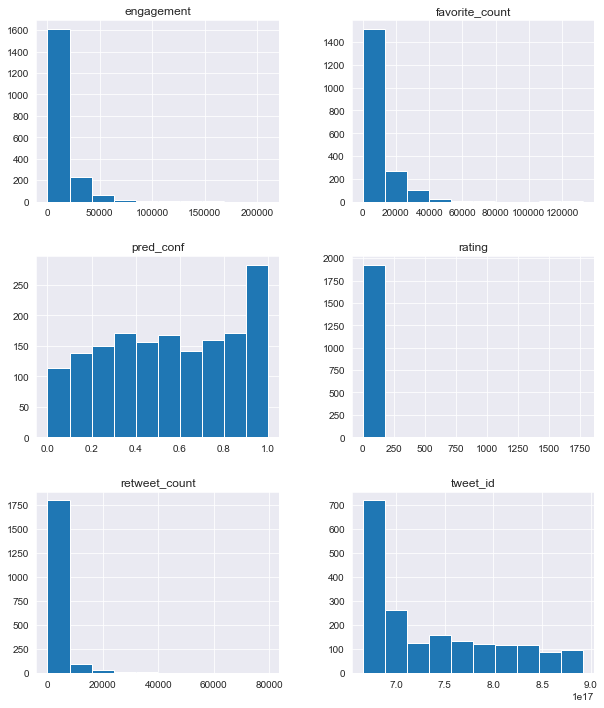

In [109]:
df.hist(figsize = (10,12));

In [110]:
df.retweet_count.describe(), df.favorite_count.describe(), df.engagement.describe()

(count     1930.000000
 mean      2814.711917
 std       4738.908611
 min         16.000000
 25%        631.750000
 50%       1374.500000
 75%       3261.000000
 max      79515.000000
 Name: retweet_count, dtype: float64,
 count      1930.000000
 mean       9060.613990
 std       12356.140249
 min          81.000000
 25%        2039.250000
 50%        4206.500000
 75%       11505.250000
 max      132810.000000
 Name: favorite_count, dtype: float64,
 count      1930.000000
 mean      11875.325907
 std       16795.393900
 min          97.000000
 25%        2681.750000
 50%        5632.500000
 75%       14870.250000
 max      210590.000000
 Name: engagement, dtype: float64)

- The retweet_count, favorite_count and engagement distribution are skewed to the right where the average lies in the right of the peak, with approximate values of 1375, 4207 and 5633 respectively.

#### What are the Top 3 Tweets with the highest levels of engagement?

In [21]:
df.nlargest(3, 'engagement', keep = 'first')

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf,engagement,month_year
764,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,None,doggo,79515,131075,en,Labrador_Retriever,0.825333,210590,2016-06
305,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,None,puppo,48265,132810,en,Lakeland_Terrier,0.196015,181075,2017-01
394,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,Stephan,NaN,56625,107015,en,Chihuahua,0.505370,163640,2016-12


- The Top 3 tweets with the highest level of engagement all have a rating of 13.
- Their predicted dog breeds are Labrador_Retriever, Lakeland_Terrier and Chihuahua respectively.

In [112]:
#top 100 tweets with the highest engagement score
(df.nlargest(100, 'engagement', keep = 'first')['engagement'].sum())/(df.engagement.sum())*100

28.244630886377852

- The top 100 tweets with the highest engagement scores make up approximately 28% of the total tweets in this WeRateDogs Archive.

#### What are top 10 dog breeds with the highest levels of engagement?

In [113]:
#extracting the top 10 breeds with the highest engagement scores
top10_breed_engagement = df.groupby('pred_breed').engagement.sum().sort_values(ascending=False).head(10)
top10_breed_engagement

pred_breed
Golden_Retriever      2518966
Labrador_Retriever    1653217
Pembroke              1330568
Chihuahua              991731
Samoyed                787352
French_Bulldog         727151
Chow                   573531
Cocker_Spaniel         553155
Pug                    501417
Toy_Poodle             452600
Name: engagement, dtype: int64

For comparison, let's calculate the average engagement score per dog breed.

In [114]:
#finding the average engagement score per breed 
breed_engagement_mean = (df.groupby('pred_breed').engagement.mean()).mean()
breed_engagement_mean

10643.74098708905

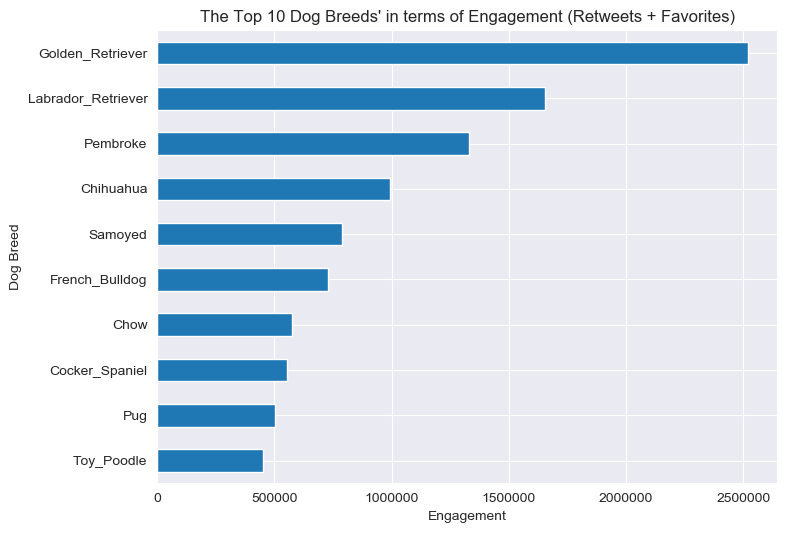

In [115]:
#plot the barchart of the above data
plt.figure(figsize=(8,6), dpi=100)
top10_breed_engagement.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("The Top 10 Dog Breeds' in terms of Engagement (Retweets + Favorites)")
plt.xlabel("Engagement",fontsize=10)
plt.ylabel("Dog Breed",fontsize=10);

- The dog breed with the highest engagement score is "Golden Retriever" with a value of 2,518,966. This is approximately 237% more than the average. Coming up in second place is "Labrador Retriever" with 1,653,217 and in third place is "Pembroke" with 1,330,568.

#### Which dog stage resulted in the highest level of engagement?

In [116]:
#extracting the dog stages with the highest engagement scores
stage_engagement = df.groupby('dog_stage').engagement.sum().sort_values(ascending=False)
stage_engagement

dog_stage
pupper            2091944
doggo             1704150
puppo              763977
doggo, pupper      140937
floofer            127223
doggo, puppo        87115
doggo, floofer      20602
Name: engagement, dtype: int64

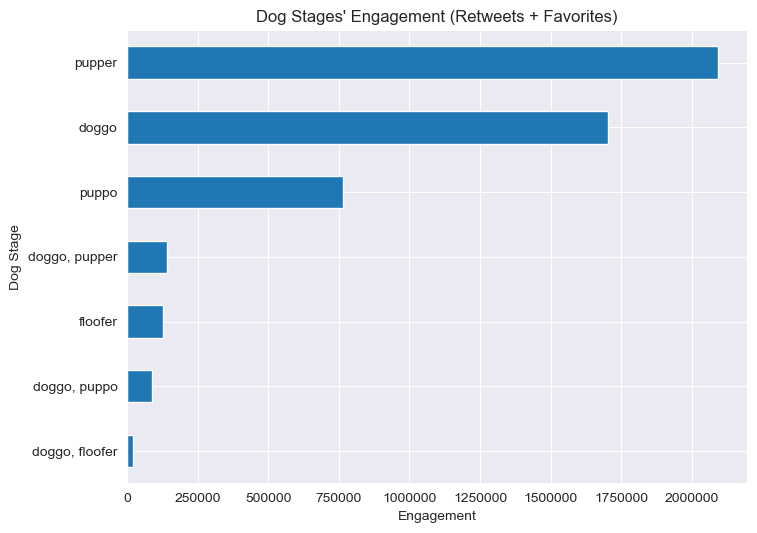

In [117]:
#plot the barchart of the above data
plt.figure(figsize=(8,6), dpi=100)
stage_engagement.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Dog Stages' Engagement (Retweets + Favorites)")
plt.xlabel("Engagement",fontsize=10)
plt.ylabel("Dog Stage",fontsize=10);

- The dog stage with the highest engagement score is "pupper" with a value of  2,091,944. Coming up in second place is "doggo" with 1,704,150 and in third place is "puppo" with 763,977.

#### Rating Distribution: What are the most common ratings? What is the highest one?

In [118]:
#display descriptive statistics 
df.rating.describe()

count    1930.000000
mean       11.794187
std        41.290419
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [119]:
df['rating'].value_counts()

12.00      446
10.00      418
11.00      393
13.00      254
9.00       150
8.00        95
7.00        51
14.00       34
5.00        32
6.00        32
4.00        15
3.00         2
2.00         1
1776.00      1
9.75         1
1.00         1
11.26        1
13.50        1
11.27        1
420.00       1
Name: rating, dtype: int64

In [130]:
#percentage of tweets with rating equal to 10 or higher 
(df[df['rating'] >= 10].count()[0]/df.shape[0])*100

80.31088082901555

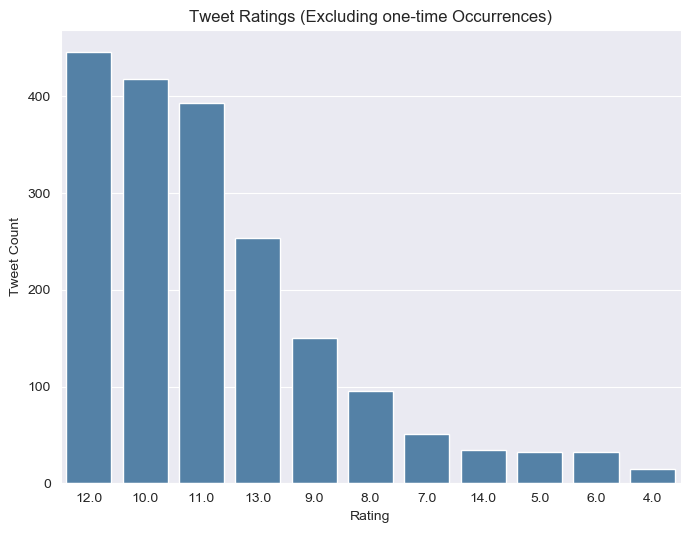

In [120]:
#plotting the value counts except with those with that appeared once
plt.figure(figsize=(8,6), dpi=100)
ax = sns.countplot(x='rating',data=df, order=df.rating.value_counts().head(11).index, color="steelblue")
ax.set_xlabel("Rating",fontsize=10)
ax.set_ylabel("Tweet Count",fontsize=10)
plt.title("Tweet Ratings (Excluding one-time Occurrences)");

- The Highest Rating ever given in the history of WeRateDogs is 1776 
- There are 1550 tweets with a rating of 10 and higher, that makes 80% of the entire dataset. They're good dogs Brent indeed!
- Ratings of 12 come in first place with a total of 446 tweets - approximately 23% of the total number of tweets.

#### Based on the prediction model used, what is the most common dog breeds?

In [121]:
top10_breed = df['pred_breed'].value_counts()[:10]
top10_breed

Golden_Retriever      154
Labrador_Retriever    103
Pembroke               94
Chihuahua              89
Pug                    61
Toy_Poodle             50
Chow                   47
Samoyed                42
Pomeranian             41
Malamute               33
Name: pred_breed, dtype: int64

In [122]:
#calculate their percentage
top10_breed_percentage = (top10_breed.sum()/df.shape[0])*100
top10_breed_percentage

36.994818652849744

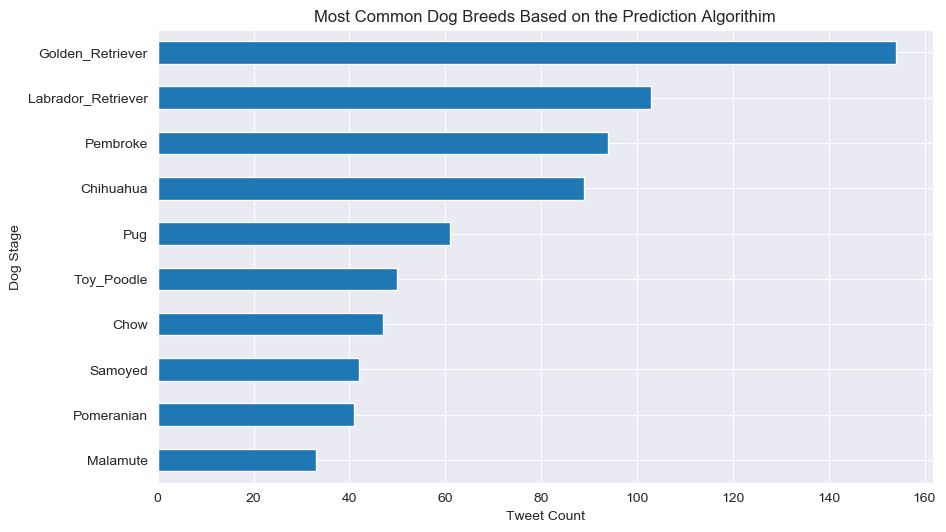

In [123]:
plt.figure(figsize=(10,6), dpi=100)
df['pred_breed'].value_counts()[:10].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Most Common Dog Breeds Based on the Prediction Algorithim")
plt.xlabel("Tweet Count",fontsize=10)
plt.ylabel("Dog Stage",fontsize=10);

- The highest dog breed is Golden_Retriever with 160 tweets in total, followed by Labrador Retriever (103) and in third place comes Pembroke (94).

- The top 10 dog breeds tweeted about make approximately 37% of the total number of tweets.  

#### WeRateDogs Monthly Engagement 

In [5]:
#extract the month and year from timestamp
df['month_year'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
df['month_year'] = df['month_year'].astype(str)
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,retweet_count,favorite_count,language,pred_breed,pred_conf,engagement,month_year
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,8853,39467,en,NaN,NaN,48320,2017-08
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,6514,33819,en,Chihuahua,0.323581,40333,2017-08
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,4328,25461,en,Chihuahua,0.716012,29789,2017-07
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,8964,42908,en,Labrador_Retriever,0.168086,51872,2017-07
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,9774,41048,en,Basset,0.555712,50822,2017-07


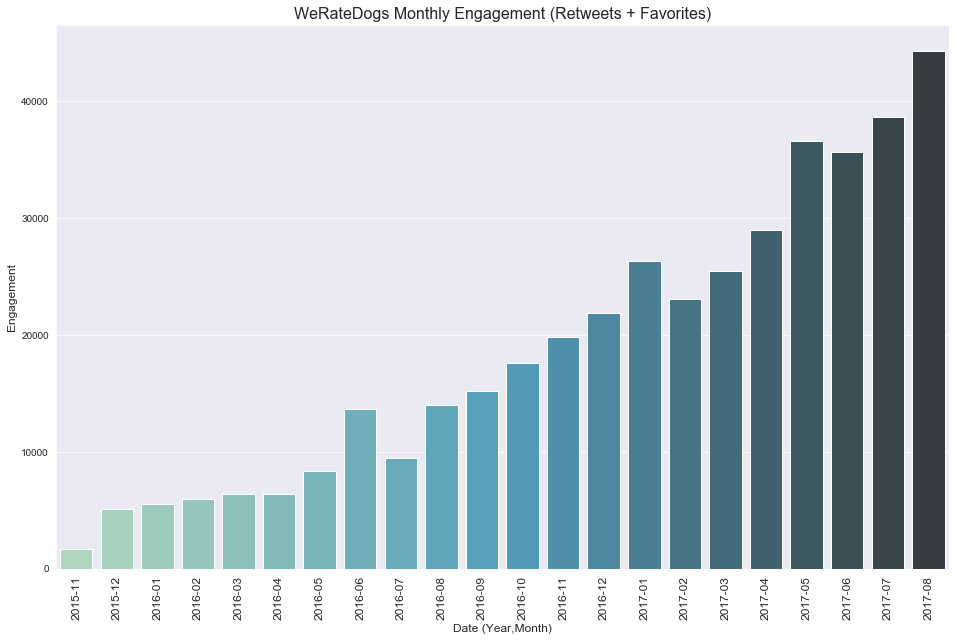

In [20]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='month_year',y='engagement', data=df, ci=None, palette="GnBu_d")
plt.gca().invert_xaxis()
plt.title("WeRateDogs Monthly Engagement (Retweets + Favorites)", fontsize = 16)
plt.xticks(rotation=90, fontsize = 12) 
plt.xlabel("Date (Year,Month)",fontsize=12)
plt.ylabel("Engagement",fontsize=12);

<a id='references'></a>
### References:

- https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe
- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
- https://regexone.com/lesson/line_beginning_end
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
- https://thomas-cokelaer.info/tutorials/python/boolean.html
- https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
- https://datatofish.com/fastest-way-to-convert-integers-to-strings-in-pandas-dataframe/
- https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas/36910033
- https://cmdlinetips.com/2018/11/how-to-join-two-text-columns-into-a-single-column-in-pandas/
- https://knowledge.udacity.com/questions/160563
- https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
- https://numpy.org/doc/stable/reference/generated/numpy.select.html
- https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime
- https://stackoverflow.com/questions/12307099/modifying-a-subset-of-rows-in-a-pandas-dataframe/44913631#44913631
- https://regexone.com/problem/matching_decimal_numbers
- https://www.thetopsites.net/article/52217046.shtml
- https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
- https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/
- https://thispointer.com/python-how-to-check-if-an-item-exists-in-list-search-by-value-or-condition/
- https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
- https://regexone.com/lesson/more_groups
- https://stackoverflow.com/questions/39141856/capitalize-first-letter-of-each-word-in-the-column-python
- https://www.impactbnd.com/blog/social-media-kpis
- https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
- https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
- https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot
- https://mode.com/example-gallery/python_horizontal_bar/
- https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
- https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
- https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
- https://stackoverflow.com/questions/43968985/changing-the-formatting-of-a-datetime-axis-in-matplotlib